In [1]:
import pandas as pd
import numpy as np
from datetime import datetime



import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import yfinance as yf
import finplot as fplt


In [2]:
# URL que contiene las compañias que conforman el indice SP500.
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

In [3]:

payload = pd.read_html(url)


# Hay 2 tablas en la pagina de Wikipedia. 
first_table = payload[0]
second_table = payload[1]

# En la primera tabla los datos que se quiere.
df500_table = first_table

df500_table

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [79]:
sp500_symbols = df500_table['Symbol'].tolist()
sp500_symbols

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA

In [4]:
# Seleccionamos las columnas mas relevantes para nuestro analisis. 
columns = ['Symbol', 'Security', 'GICS Sector', 'GICS Sub-Industry',
       'Headquarters Location', 'Founded']

In [111]:
df_table = df500_table[columns]
df_table.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",1989


Graficamos todos los Sectores (GICS Sector)

In [112]:
# Vemos  como se distribuyen los 11 sectores de GICS
sectors = df_table['GICS Sector'].value_counts( ascending = True)
sectors


Energy                    23
Communication Services    25
Materials                 29
Utilities                 30
Real Estate               30
Consumer Staples          33
Consumer Discretionary    56
Health Care               64
Financials                67
Industrials               70
Information Technology    76
Name: GICS Sector, dtype: int64

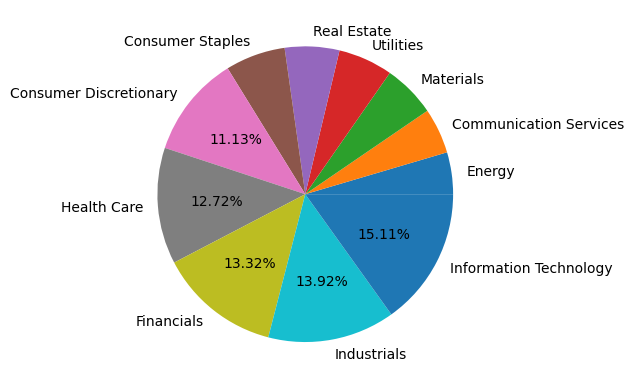

In [50]:
# Graficamos con 'plt.pie' donde mostrara el porcetaje de cada Sector. 

# Solo mostratra las etiquetas con mayor del 10%
def autopct(pct): 
    return ('{:.2f}%'.format(pct))  if pct > 10 else ''

plt.pie(sectors.values, labels = sectors.index, autopct=autopct)
plt.show()




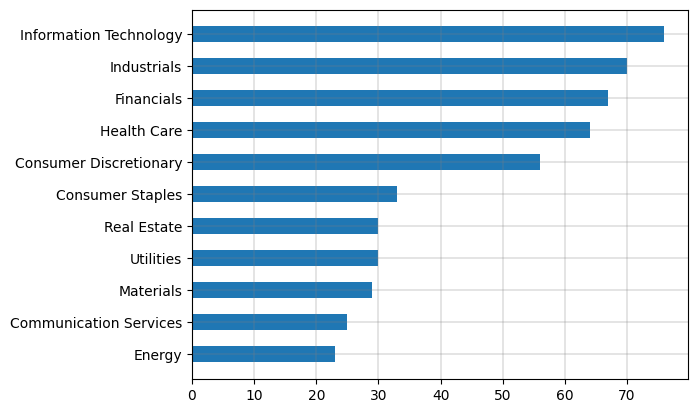

In [51]:
from math import *

plt.barh(sectors.index,sectors.values, height=0.5 )
plt.grid(color='gray', linestyle='-', linewidth = 0.3)
plt.show()

Graficamos las Sub Industrias (GICS Sub-Industry)

In [52]:
sub_industry = df_table['GICS Sub-Industry'].value_counts()
sub_industry

Health Care Equipment     18
Semiconductors            15
Industrial Machinery      14
Electric Utilities        13
Multi-Utilities           13
                          ..
Copper                     1
Consumer Electronics       1
Health Care Technology     1
Leisure Products           1
Household Appliances       1
Name: GICS Sub-Industry, Length: 123, dtype: int64

Importamos el los valores del Indice SP500

In [83]:
ticker = '^GSPC'

start_date = '2000-01-01'
end_date  = datetime.now().strftime('%Y-%m-%d')

In [101]:
# Descargamos los valores con intervalo '1D'
sp= yf.download(ticker, start = start_date, end = end_date, interval = '1D')
sp

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2023-02-22,4001.830078,4017.370117,3976.899902,3991.050049,3991.050049,4079320000
2023-02-23,4018.600098,4028.300049,3969.189941,4012.320068,4012.320068,3952940000
2023-02-24,3973.239990,3978.250000,3943.080078,3970.040039,3970.040039,3877700000


In [107]:
sp = sp.reset_index()
sp

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...,...
5821,2023-02-22,4001.830078,4017.370117,3976.899902,3991.050049,3991.050049,4079320000
5822,2023-02-23,4018.600098,4028.300049,3969.189941,4012.320068,4012.320068,3952940000
5823,2023-02-24,3973.239990,3978.250000,3943.080078,3970.040039,3970.040039,3877700000
5824,2023-02-27,3992.360107,4018.050049,3973.550049,3982.239990,3982.239990,3836950000


Grafico del Indice 

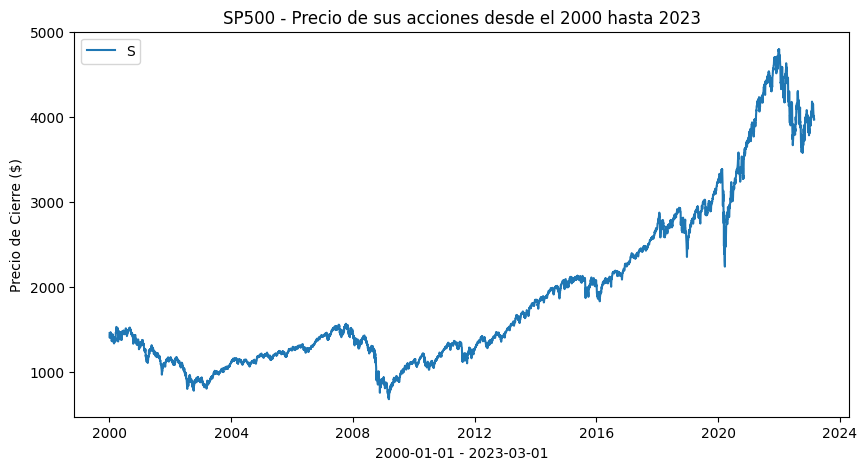

In [102]:
# Graficar los datos

plt.figure(figsize = (10,5))
plt.plot(sp['Close'], label = 'SP500')
plt.title('SP500 - Precio de sus acciones desde el 2000 hasta 2023')
plt.xlabel('2000-01-01 - 2023-03-01')
plt.ylabel('Precio de Cierre ($)')
plt.legend('SP500')

plt.show()

In [103]:
## Media movil de 30
MVS30 = pd.DataFrame()
MVS30['Close'] = sp['Close'].rolling(window = 30).mean()

In [104]:
## Media movil de 100
MVS100 = pd.DataFrame()
MVS100['Close'] = sp['Close'].rolling(window = 100).mean()

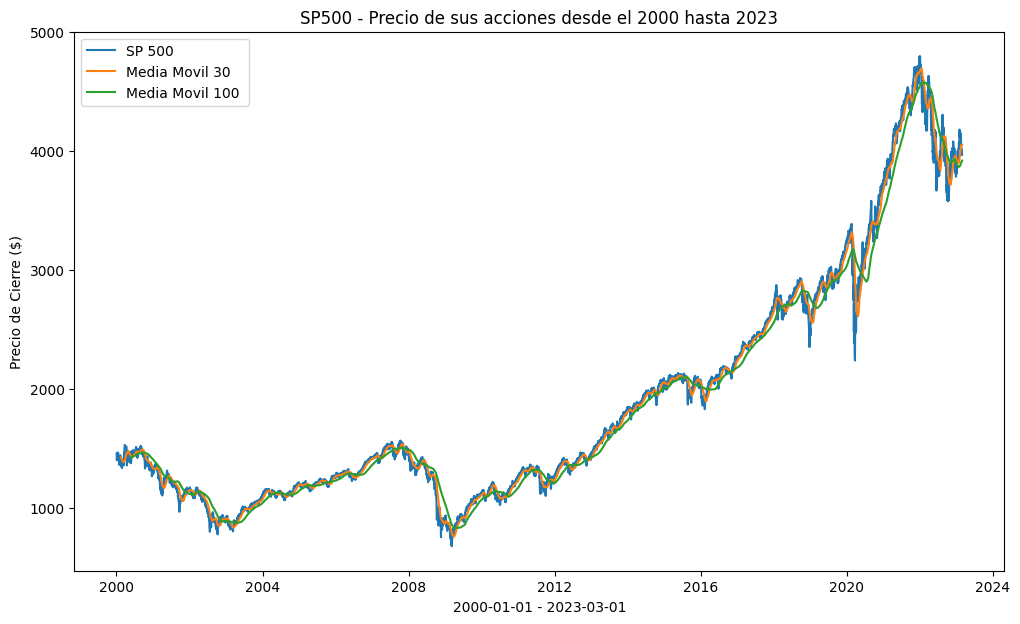

In [105]:
# Grafico de las MEDIAS MOVILES DE 30 Y 100


plt.figure(figsize = (12,7))
plt.plot(sp['Close'], label = 'SP 500')

plt.plot(MVS30['Close'], label = 'Media Movil 30 ')
plt.plot(MVS100['Close'], label = 'Media Movil 100 ')


plt.title('SP500 - Precio de sus acciones desde el 2000 hasta 2023')
plt.xlabel('2000-01-01 - 2023-03-01')
plt.ylabel('Precio de Cierre ($)')
plt.legend('SP500')
plt.legend( loc = 'upper left')

plt.show()


Importamos los datos de cada Empresa.

In [89]:
sp500 = pd.DataFrame()

#  Descargamos los datos. 
for symbol in sp500_symbols:
    print(f"Descargando datos para {symbol}...")
    data = yf.download(symbol, start=start_date, end=end_date)
    if len(data) > 0:
        data['Symbol'] = symbol
        sp500 = sp500.append(data)

Descargando datos para MMM...
[*********************100%***********************]  1 of 1 completed
Descargando datos para AOS...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ABT...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ABBV...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ACN...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ATVI...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ADM...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ADBE...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ADP...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AAP...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AES...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AFL...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para A...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para APD...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AKAM...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ALK...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ALB...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ARE...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ALGN...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ALLE...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LNT...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ALL...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GOOGL...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GOOG...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MO...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AMZN...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AMCR...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AMD...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AEE...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AAL...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AEP...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AXP...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AIG...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AMT...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AWK...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AMP...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ABC...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AME...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AMGN...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para APH...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ADI...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ANSS...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AON...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para APA...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AAPL...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AMAT...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para APTV...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ACGL...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ANET...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AJG...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AIZ...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para T...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ATO...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ADSK...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AZO...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AVB...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AVY...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BKR...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BALL...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BAC...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BBWI...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BAX...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BDX...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para WRB...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BRK.B...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BRK.B: No timezone found, symbol may be delisted
Descargando datos para BBY...
[*********************100%***********************]  1 of 1 completed
Descargando datos para BIO...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TECH...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BIIB...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BLK...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BK...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BA...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BKNG...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BWA...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BXP...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BSX...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BMY...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AVGO...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BR...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BRO...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BF.B...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BF.B: No data found for this date range, symbol may be delisted
Descargando datos para CHRW...
[*********************100%***********************]  1 of 1 completed
Descargando datos para CDNS...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CZR...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CPT...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CPB...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para COF...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CAH...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para KMX...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CCL...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CARR...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CTLT...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CAT...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CBOE...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CBRE...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CDW...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CE...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CNC...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CNP...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CDAY...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CF...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CRL...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SCHW...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CHTR...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CVX...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CMG...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CB...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CHD...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CI...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CINF...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CTAS...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CSCO...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para C...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CFG...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CLX...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CME...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CMS...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para KO...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CTSH...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CL...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CMCSA...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CMA...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CAG...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para COP...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ED...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para STZ...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CEG...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para COO...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CPRT...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GLW...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CTVA...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CSGP...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para COST...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CTRA...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CCI...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CSX...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CMI...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CVS...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DHI...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DHR...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DRI...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DVA...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DE...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DAL...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para XRAY...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


Descargando datos para DVN...
[*********************100%***********************]  1 of 1 completed
Descargando datos para DXCM...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FANG...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DLR...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DFS...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DISH...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DIS...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DG...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


Descargando datos para DLTR...
[*********************100%***********************]  1 of 1 completed
Descargando datos para D...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DPZ...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DOV...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DOW...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DTE...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DUK...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DD...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DXC...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EMN...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ETN...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EBAY...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ECL...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EIX...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EW...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EA...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ELV...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LLY...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EMR...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ENPH...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ETR...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EOG...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EPAM...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EQT...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EFX...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EQIX...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EQR...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ESS...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EL...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ETSY...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para RE...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EVRG...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ES...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EXC...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


Descargando datos para EXPE...
[*********************100%***********************]  1 of 1 completed
Descargando datos para EXPD...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EXR...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para XOM...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FFIV...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FDS...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FAST...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FRT...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FDX...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FITB...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FRC...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FSLR...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FE...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FIS...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FISV...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FLT...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FMC...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para F...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FTNT...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FTV...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FOXA...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FOX...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BEN...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FCX...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GRMN...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para IT...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GEHC...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GEN...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GNRC...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GD...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GE...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GIS...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GM...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GPC...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GILD...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GL...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GPN...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GS...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HAL...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HIG...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HAS...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HCA...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PEAK...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HSIC...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HSY...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HES...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HPE...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HLT...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HOLX...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HD...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HON...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HRL...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HST...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HWM...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HPQ...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HUM...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HBAN...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HII...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para IBM...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para IEX...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para IDXX...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ITW...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ILMN...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para INCY...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para IR...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para INTC...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ICE...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para IFF...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para IP...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para IPG...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para INTU...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ISRG...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para IVZ...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para INVH...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para IQV...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para IRM...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para JBHT...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para JKHY...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para J...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para JNJ...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para JCI...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para JPM...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para JNPR...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para K...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para KDP...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para KEY...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para KEYS...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para KMB...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


Descargando datos para KIM...
[*********************100%***********************]  1 of 1 completed
Descargando datos para KMI...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para KLAC...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para KHC...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para KR...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LHX...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LH...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LRCX...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LW...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LVS...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LDOS...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LEN...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LNC...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LIN...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LYV...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LKQ...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LMT...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para L...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


Descargando datos para LOW...
[*********************100%***********************]  1 of 1 completed
Descargando datos para LUMN...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LYB...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MTB...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MRO...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MPC...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


Descargando datos para MKTX...
[*********************100%***********************]  1 of 1 completed
Descargando datos para MAR...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MMC...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MLM...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MAS...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MA...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MTCH...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MKC...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MCD...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MCK...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MDT...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MRK...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para META...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MET...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MTD...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MGM...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MCHP...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MU...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MSFT...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MAA...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MRNA...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MHK...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MOH...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TAP...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MDLZ...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MPWR...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MNST...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MCO...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MS...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MOS...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MSI...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MSCI...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NDAQ...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NTAP...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NFLX...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NWL...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NEM...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NWSA...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NWS...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NEE...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NKE...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NI...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NDSN...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NSC...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NTRS...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NOC...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NCLH...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NRG...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NUE...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NVDA...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NVR...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NXPI...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ORLY...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para OXY...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ODFL...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para OMC...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ON...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para OKE...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ORCL...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para OGN...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para OTIS...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PCAR...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PKG...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PARA...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PH...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PAYX...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PAYC...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PYPL...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PNR...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PEP...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PKI...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PFE...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PCG...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PM...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PSX...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PNW...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PXD...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PNC...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para POOL...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PPG...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PPL...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PFG...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PG...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PGR...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PLD...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PRU...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PEG...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PTC...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PSA...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PHM...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para QRVO...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PWR...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para QCOM...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DGX...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para RL...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para RJF...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para RTX...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para O...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para REG...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para REGN...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para RF...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para RSG...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para RMD...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para RHI...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ROK...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ROL...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ROP...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ROST...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para RCL...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SPGI...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed

C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)



Descargando datos para CRM...
[*********************100%***********************]  1 of 1 completed
Descargando datos para SBAC...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SLB...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para STX...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SEE...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SRE...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NOW...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SHW...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SBNY...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SPG...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SWKS...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SJM...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SNA...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SEDG...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SO...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LUV...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SWK...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SBUX...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para STT...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para STLD...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para STE...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SYK...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SIVB...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SYF...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SNPS...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SYY...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TMUS...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TROW...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TTWO...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TPR...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TRGP...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TGT...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TEL...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TDY...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TFX...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TER...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TSLA...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TXN...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TXT...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TMO...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TJX...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TSCO...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TT...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TDG...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TRV...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TRMB...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TFC...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TYL...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TSN...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para USB...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para UDR...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ULTA...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para UNP...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para UAL...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para UPS...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para URI...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para UNH...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para UHS...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para VLO...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para VTR...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para VRSN...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para VRSK...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para VZ...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para VRTX...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para VFC...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para VTRS...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para VICI...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para V...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para VMC...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para WAB...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para WBA...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para WMT...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para WBD...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para WM...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para WAT...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para WEC...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para WFC...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para WELL...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para WST...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para WDC...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para WRK...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para WY...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para WHR...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para WMB...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para WTW...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GWW...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para WYNN...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para XEL...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para XYL...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para YUM...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ZBRA...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ZBH...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ZION...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ZTS...


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3998639744.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500 = sp500.append(data)


In [95]:
# Hacemos una copia del dataframe.
copy_sp500 = sp500.copy()
copy_sp500

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2000-01-03,48.031250,48.250000,47.031250,47.187500,25.525518,2173400,MMM
1,2000-01-04,46.437500,47.406250,45.312500,45.312500,24.511263,2713800,MMM
2,2000-01-05,45.562500,48.125000,45.562500,46.625000,25.221239,3699400,MMM
3,2000-01-06,47.156250,51.250000,47.156250,50.375000,27.249752,5975800,MMM
4,2000-01-07,50.562500,51.906250,49.968750,51.375000,27.790686,4101200,MMM
...,...,...,...,...,...,...,...,...
2607520,2023-02-22,168.399994,169.110001,165.869995,166.429993,166.429993,2103800,ZTS
2607521,2023-02-23,167.380005,169.729996,166.169998,169.500000,169.500000,1769000,ZTS
2607522,2023-02-24,167.000000,168.070007,163.910004,166.330002,166.330002,1843200,ZTS
2607523,2023-02-27,168.000000,168.410004,164.990005,165.470001,165.470001,1183700,ZTS


Analizamos el dataframe.

In [90]:
sp500.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2607525 entries, 2000-01-03 to 2023-02-28
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Open       float64
 1   High       float64
 2   Low        float64
 3   Close      float64
 4   Adj Close  float64
 5   Volume     int64  
 6   Symbol     object 
dtypes: float64(5), int64(1), object(1)
memory usage: 159.2+ MB


In [91]:
sp500.head()


,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2000-01-03,48.03125,48.25000,47.03125,47.1875,25.525518,2173400,MMM
2000-01-04,46.43750,47.40625,45.31250,45.3125,24.511263,2713800,MMM
2000-01-05,45.56250,48.12500,45.56250,46.6250,25.221239,3699400,MMM
2000-01-06,47.15625,51.25000,47.15625,50.3750,27.249752,5975800,MMM
2000-01-07,50.56250,51.90625,49.96875,51.3750,27.790686,4101200,MMM


In [92]:
#Cambio de los índices agregando a la fecha como columna ya que la traia como índice
sp500= sp500.reset_index()


Unimos con nuestro primer dataframe.


In [96]:
# Uno por el campo "Symbol"
df = pd.merge(sp500, df, on='Symbol')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Founded
0,2000-01-03,48.03125,48.25000,47.03125,47.1875,25.525518,2173400,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1902
1,2000-01-04,46.43750,47.40625,45.31250,45.3125,24.511263,2713800,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1902
2,2000-01-05,45.56250,48.12500,45.56250,46.6250,25.221239,3699400,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1902
3,2000-01-06,47.15625,51.25000,47.15625,50.3750,27.249752,5975800,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1902
4,2000-01-07,50.56250,51.90625,49.96875,51.3750,27.790686,4101200,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1902


In [97]:
#Agrego una columna con los días de la semana, que me puede servir para un analisis posterior

Day = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miercoles',
    3: 'Jueves',
    4: 'Viernes',
    5: 'Sábado',
    6: 'Domingo'}

#Uno el df con los datos del dicc asignando para cada fecha un día correspondiente.

df['Day'] = df['Date'].dt.dayofweek.map(Day)

In [98]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Founded,Day
0,2000-01-03,48.03125,48.25000,47.03125,47.1875,25.525518,2173400,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1902,Lunes
1,2000-01-04,46.43750,47.40625,45.31250,45.3125,24.511263,2713800,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1902,Martes
2,2000-01-05,45.56250,48.12500,45.56250,46.6250,25.221239,3699400,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1902,Miercoles
3,2000-01-06,47.15625,51.25000,47.15625,50.3750,27.249752,5975800,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1902,Jueves
4,2000-01-07,50.56250,51.90625,49.96875,51.3750,27.790686,4101200,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1902,Viernes


Graficos de Lineas: Variacion de los cierres a lo largo de los años.

In [118]:
# Creo una columna con solo los años
df['Year'] = df['Date'].dt.year

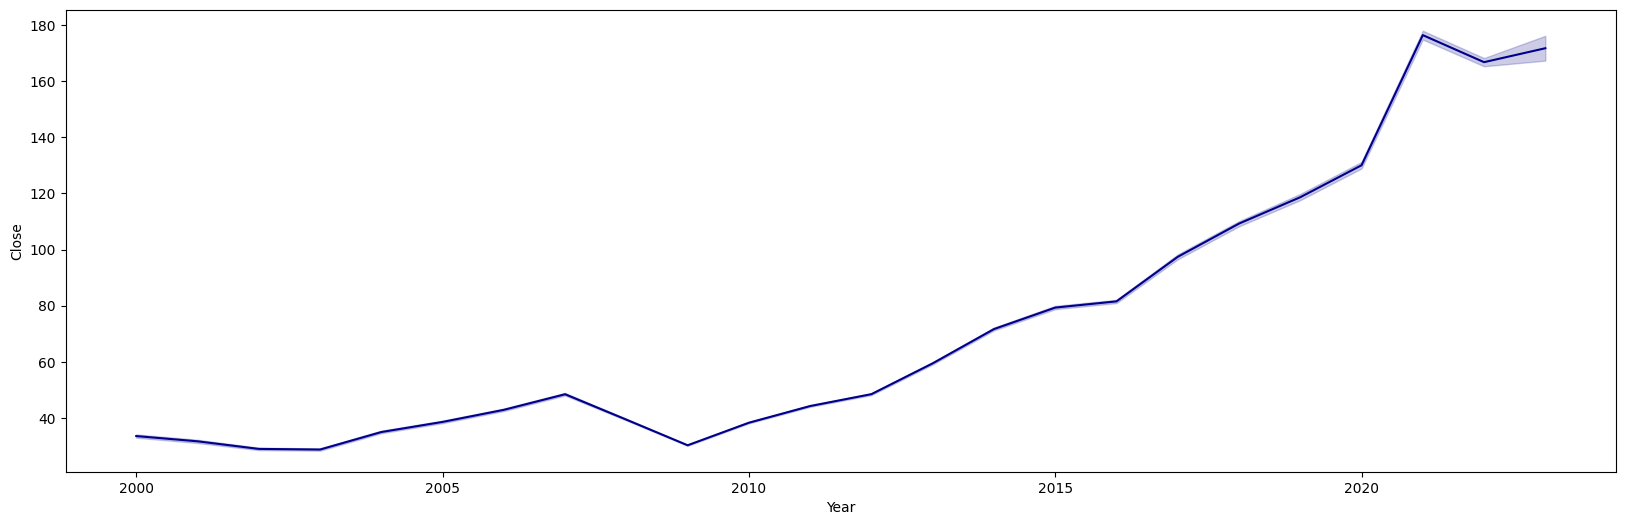

In [121]:
import seaborn as sns
plt.subplots(figsize=(20, 6))
sns.lineplot(data= df, x= 'Year', y= 'Close', color='darkblue' )
plt.show()

Relación entre el precio de cierre del índice SP500 y su volumen.

C:\Users\Carlos\AppData\Local\Temp\ipykernel_15972\3430609578.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Volume', y='Close', data=df, palette='Oranges_r')


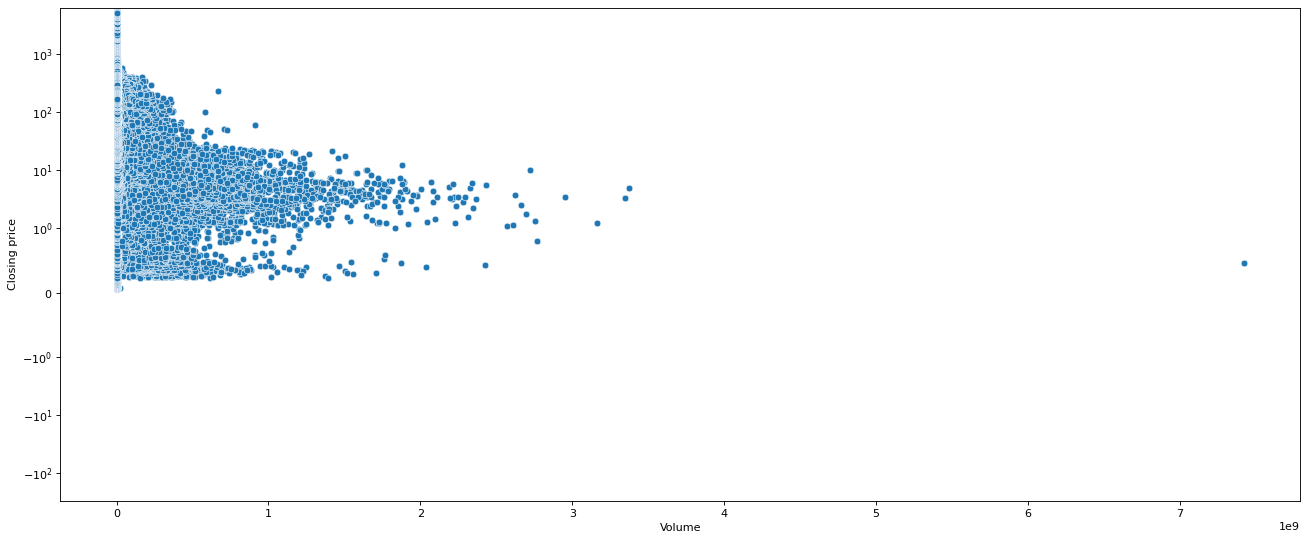

In [120]:
plt.figure(figsize=(20, 8), dpi=80)
sns.scatterplot(x='Volume', y='Close', data=df, palette='Oranges_r')
plt.yscale('symlog', linthresh=1)
plt.xlabel('Volume')
plt.ylabel('Closing price')
plt.show()

In [106]:
# Exportamos el dataframe final a un .csv
df.to_csv('sp500_total.csv',  index = False)


In [108]:
sp.to_csv('sp500.csv',  index = False)

In [115]:
df_table.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",1989


In [116]:
df_table.to_csv('df.csv', index = False , header = True)